In [3]:
import numpy as np
import sys
sys.path.append("..")
from modules.evaluation import EvaluationFramework
from pyod.models.iforest import IForest
%config Completer.use_jedi = False

/home/harrison/.virtualenvs/anomaly_detection/lib/python3.6/site-packages/umap/__init__.py:9: UserWarning: Tensorflow not installed; ParametricUMAP will be unavailable
  warn("Tensorflow not installed; ParametricUMAP will be unavailable")


In [4]:
## 4-Dimensional data generator
def generate_data():
    x1 = np.random.multivariate_normal([10,24,1,3], [[5,0,0,0],[0,15,0,0],[0,0,1,0],[0,0,0,13]], 100)
    x2 = np.random.multivariate_normal([10,24,1,15], [[15,0,0,0],[0,5,0,0],[0,0,2,0],[0,0,0,9]], 100)
    x3 = np.random.multivariate_normal([10,24,1,47], [[5,0,0,0],[0,4,0,0],[0,0,13,0],[0,0,0,4]], 100)
    x4 = np.array(list(zip(np.random.uniform(-50,50,10), np.random.uniform(-50,50,10), np.random.uniform(-50,50,10), np.random.uniform(-50,50,10))))

    X = np.concatenate([x1, x2, x3, x4])
    Y = np.concatenate([np.zeros(len(x1)), np.zeros(len(x2)), np.zeros(len(x3)), np.ones(len(x4))])
    return (X,Y)

In [5]:
x,y = generate_data()
model = IForest(n_estimators=100,
                max_samples='auto',
                contamination=10/310,
                bootstrap=False,
                max_features=1.0)

In [6]:
eva = EvaluationFramework(model)
eva.fit(x)

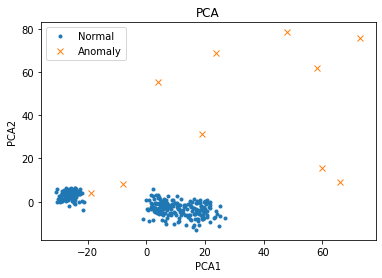

In [7]:
eva.visualise(x)

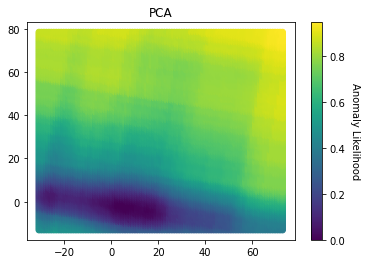

In [14]:
eva.heatmap(x, method='pca')

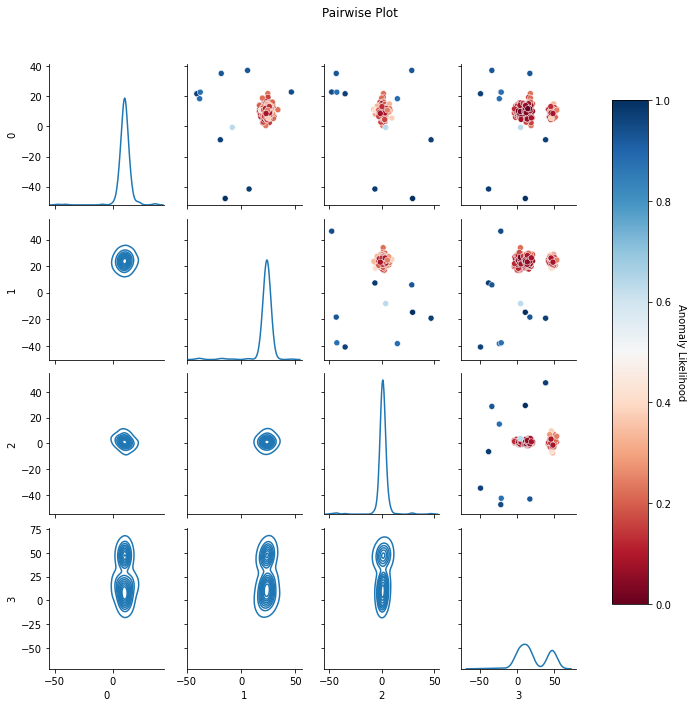

In [7]:
eva.pairplot(x)